# Movie Data Analysis

By Joe Fioramonti

With the proposition of starting a new movie studio, I looked to evaluate how different genres compare in regards to the return of investment. 

I used data from IMDB with values in production budget, world wide gross, and the genre of the movies.

### Import relevent Python libraries.

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

### Import data sets and Data manipulation.

In [195]:
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


In [196]:
conn = sqlite3.connect("im.db")

In [197]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [198]:
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


I combined the two data sets together, dropped unwanted columns, and viewed informtion describing the data.

In [199]:
movies_join = movie_budgets.merge(movie_basics, left_on=["movie"],right_on=["primary_title"], how='left')

movies_join

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,Abatâ,2011.0,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7216,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"
7217,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",NaN,NaN,NaN,NaN,NaN,NaN
7218,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",NaN,NaN,NaN,NaN,NaN,NaN
7219,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,tt2107644,A Plague So Pleasant,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller"


In [200]:
movies = movies_join.drop(columns=['movie_id','primary_title','original_title'])

In [201]:
movies.dtypes

id                     int64
release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
start_year           float64
runtime_minutes      float64
genres                object
dtype: object

In [202]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 0 to 7220
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7221 non-null   int64  
 1   release_date       7221 non-null   object 
 2   movie              7221 non-null   object 
 3   production_budget  7221 non-null   object 
 4   domestic_gross     7221 non-null   object 
 5   worldwide_gross    7221 non-null   object 
 6   start_year         3815 non-null   float64
 7   runtime_minutes    3328 non-null   float64
 8   genres             3743 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 564.1+ KB


To work with the data, I needed to change some of the data types. 

I created a function to look through the data and remove symbols that would impare the ability for certain columns to be correctly typed.

In [203]:
def convert_money_type(x):
    new_x = x.replace(',','').replace('$','')
    return float(new_x)

Applying the function to selected columns. 

In [204]:
movies['production_budget'] = movies['production_budget'].apply(convert_money_type)

In [205]:
movies['domestic_gross'] = movies['domestic_gross'].apply(convert_money_type)

In [206]:
movies['worldwide_gross'] = movies['worldwide_gross'].apply(convert_money_type)

The 'worldwide_gross' column had many large values that needed to be represented in full and as an exponent. 

In [207]:
movies['worldwide_gross'] = movies['worldwide_gross'].astype('int64') 

In [208]:
movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279,2011.0,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747,NaN,NaN,NaN


To calculate the return of investment, I needed to calculate the profit for each movie.

I used the world wide gross over the domestic gross as I view it better represents the full potential of income for a movie.

In [209]:
movies['profit'] = movies['worldwide_gross'] - movies['production_budget'] 

In [210]:
movies['profit'] = movies['profit'].astype('int64') 

In [211]:
movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279,2011.0,93.0,Horror,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875,2011.0,136.0,"Action,Adventure,Fantasy",635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350,2019.0,113.0,"Action,Adventure,Sci-Fi",-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963,2015.0,141.0,"Action,Adventure,Sci-Fi",1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747,NaN,NaN,NaN,999721747


Using the created profit column, I can divide the profit by the production budget to find the return of investment and add a new column with the result.

In [212]:
movies['roi'] = movies['profit'] / movies['production_budget']

To clean the data, I removed columns with null values and any outliers. 

In [213]:
movies = movies.dropna()

movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279,2011.0,93.0,Horror,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875,2011.0,136.0,"Action,Adventure,Fantasy",635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350,2019.0,113.0,"Action,Adventure,Sci-Fi",-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963,2015.0,141.0,"Action,Adventure,Sci-Fi",1072413963,3.243841
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2048134200,2018.0,149.0,"Action,Adventure,Sci-Fi",1748134200,5.827114
...,...,...,...,...,...,...,...,...,...,...,...
7204,67,"Apr 28, 2006",Clean,10000.0,138711.0,138711,2017.0,70.0,"Comedy,Drama,Horror",128711,12.871100
7205,68,"Jul 6, 2001",Cure,10000.0,94596.0,94596,2011.0,93.0,Drama,84596,8.459600
7211,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4584,2011.0,95.0,"Comedy,Drama",-4416,-0.490667
7216,78,"Dec 31, 2018",Red 11,7000.0,0.0,0,2019.0,77.0,"Horror,Sci-Fi,Thriller",-7000,-1.000000


In [214]:
movies = movies[movies.worldwide_gross != 0]

movies = movies[movies.domestic_gross != 0]

movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279,2011.0,93.0,Horror,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875,2011.0,136.0,"Action,Adventure,Fantasy",635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350,2019.0,113.0,"Action,Adventure,Sci-Fi",-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963,2015.0,141.0,"Action,Adventure,Sci-Fi",1072413963,3.243841
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2048134200,2018.0,149.0,"Action,Adventure,Sci-Fi",1748134200,5.827114
...,...,...,...,...,...,...,...,...,...,...,...
7177,45,"Jan 27, 2017",Emily,27000.0,3547.0,3547,2017.0,83.0,Drama,-23453,-0.868630
7178,45,"Jan 27, 2017",Emily,27000.0,3547.0,3547,2013.0,26.0,Documentary,-23453,-0.868630
7204,67,"Apr 28, 2006",Clean,10000.0,138711.0,138711,2017.0,70.0,"Comedy,Drama,Horror",128711,12.871100
7205,68,"Jul 6, 2001",Cure,10000.0,94596.0,94596,2011.0,93.0,Drama,84596,8.459600


In [215]:
q_low = movies['roi'].quantile(0.01)
q_hi  = movies['roi'].quantile(0.99)

movies = movies[(movies['roi'] < q_hi) & (movies['roi'] > q_low)]

movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279,2011.0,93.0,Horror,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875,2011.0,136.0,"Action,Adventure,Fantasy",635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350,2019.0,113.0,"Action,Adventure,Sci-Fi",-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963,2015.0,141.0,"Action,Adventure,Sci-Fi",1072413963,3.243841
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2048134200,2018.0,149.0,"Action,Adventure,Sci-Fi",1748134200,5.827114
...,...,...,...,...,...,...,...,...,...,...,...
7177,45,"Jan 27, 2017",Emily,27000.0,3547.0,3547,2017.0,83.0,Drama,-23453,-0.868630
7178,45,"Jan 27, 2017",Emily,27000.0,3547.0,3547,2013.0,26.0,Documentary,-23453,-0.868630
7204,67,"Apr 28, 2006",Clean,10000.0,138711.0,138711,2017.0,70.0,"Comedy,Drama,Horror",128711,12.871100
7205,68,"Jul 6, 2001",Cure,10000.0,94596.0,94596,2011.0,93.0,Drama,84596,8.459600


The movies each had multible genres listed.  To be able to filter by each individual genre, I needed to seperate the genres listed. 

In [233]:
movies['genres'] = movies['genres'].str.split(',')

In [217]:
movies = movies.explode('genres')

In [218]:
movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279,2011.0,93.0,Horror,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875,2011.0,136.0,Action,635063875,1.546673
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875,2011.0,136.0,Adventure,635063875,1.546673
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875,2011.0,136.0,Fantasy,635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350,2019.0,113.0,Action,-200237650,-0.572108
...,...,...,...,...,...,...,...,...,...,...,...
7204,67,"Apr 28, 2006",Clean,10000.0,138711.0,138711,2017.0,70.0,Drama,128711,12.871100
7204,67,"Apr 28, 2006",Clean,10000.0,138711.0,138711,2017.0,70.0,Horror,128711,12.871100
7205,68,"Jul 6, 2001",Cure,10000.0,94596.0,94596,2011.0,93.0,Drama,84596,8.459600
7211,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4584,2011.0,95.0,Comedy,-4416,-0.490667


### Filtering and plottig Data.

Creating a new table with the genre counts.

In [219]:
genre_count = pd.DataFrame(movies.genres.value_counts().reset_index().values, columns=["genre", "count"])

genre_count

,genre,count
0,Drama,1410
1,Comedy,690
2,Action,565
3,Thriller,442
4,Adventure,421
5,Documentary,366
6,Crime,318
7,Romance,300
8,Horror,285
9,Biography,217


Genre count bar chart

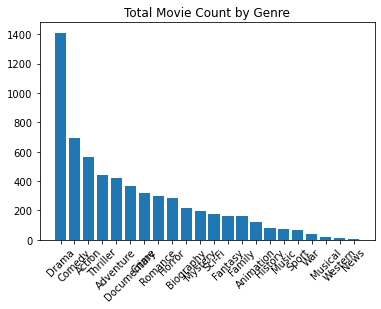

In [220]:
plt.bar(genre_count['genre'],genre_count['count'])

plt.title('Total Movie Count by Genre')

plt.xticks(rotation = 45)
plt.show()

I then compared the mean of each genres ROI.

In [221]:
genre_roi = pd.DataFrame(movies.groupby('genres')['roi'].mean().reset_index().values, columns=["genre", "roi"])

genre_roi

,genre,roi
0,Action,2.047984
1,Adventure,2.161019
2,Animation,2.987552
3,Biography,2.112701
4,Comedy,2.491511
5,Crime,1.515053
6,Documentary,2.065306
7,Drama,2.258834
8,Family,3.002823
9,Fantasy,3.390582


Roi by genre bar chart.

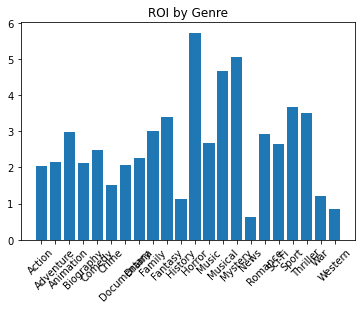

In [222]:
plt.bar(genre_roi['genre'],genre_roi['roi'])

plt.title('ROI by Genre')

plt.xticks(rotation = 45)
plt.show()

I chose to plot a few different genres production budget and ROI to see how they may differ from each other.

In [223]:
comedy = movies[movies['genres'].str.contains('Comedy')]

comedy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,profit,roi
14,15,"Nov 24, 2010",Tangled,260000000.0,200821936.0,586477240,2010.0,100.0,Comedy,326477240,1.255682
34,35,"May 25, 2012",Men in Black 3,215000000.0,179020854.0,654213485,2012.0,106.0,Comedy,439213485,2.042853
50,46,"Jun 17, 2016",Finding Dory,200000000.0,486295561.0,1021215193,2016.0,97.0,Comedy,821215193,4.106076
51,47,"Jun 18, 2010",Toy Story 3,200000000.0,415004880.0,1068879522,2010.0,103.0,Comedy,868879522,4.344398
59,53,"Jun 21, 2013",Monsters University,200000000.0,268488329.0,743588329,2013.0,104.0,Comedy,543588329,2.717942
...,...,...,...,...,...,...,...,...,...,...,...
7134,4,"Jul 25, 2014",Happy Christmas,70000.0,30312.0,30312,2014.0,82.0,Comedy,-39688,-0.566971
7142,11,"Jan 25, 2013",Supporting Characters,60000.0,4917.0,4917,2012.0,87.0,Comedy,-55083,-0.918050
7149,18,"Nov 12, 2010",Tiny Furniture,50000.0,391674.0,424149,2010.0,98.0,Comedy,374149,7.482980
7204,67,"Apr 28, 2006",Clean,10000.0,138711.0,138711,2017.0,70.0,Comedy,128711,12.871100


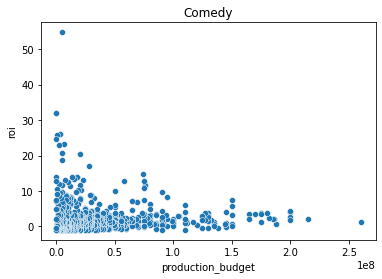

In [224]:
sns.scatterplot(data=comedy, x="production_budget", y="roi", legend=False, sizes=(20, 2000))

plt.title('Comedy')

plt.show()

In [225]:
action = movies[movies['genres'].str.contains('Action')]

action

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,profit,roi
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875,2011.0,136.0,Action,635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350,2019.0,113.0,Action,-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963,2015.0,141.0,Action,1072413963,3.243841
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2048134200,2018.0,149.0,Action,1748134200,5.827114
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,655945209,2017.0,120.0,Action,355945209,1.186484
...,...,...,...,...,...,...,...,...,...,...,...
6905,17,"Jul 27, 2001",Jackpot,400000.0,44452.0,44452,2011.0,86.0,Action,-355548,-0.888870
6921,28,"Jan 1, 1980",Maniac,350000.0,10000000.0,10000000,2011.0,160.0,Action,9650000,27.571429
6969,72,"Apr 28, 2017",Sleight,250000.0,3930990.0,3934450,2016.0,89.0,Action,3684450,14.737800
7059,43,"Sep 23, 2011",Weekend,190000.0,484592.0,1577585,2011.0,121.0,Action,1387585,7.303079


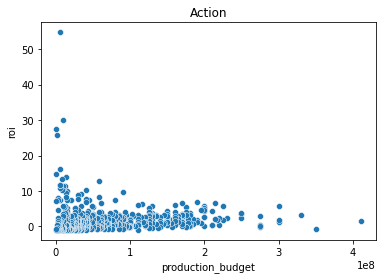

In [226]:
sns.scatterplot(data=action, x="production_budget", y="roi", legend=False, sizes=(20, 2000))

plt.title('Action')

plt.show()

In [227]:
drama = movies[movies['genres'].str.contains('Drama')]

drama

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,profit,roi
38,39,"May 14, 2010",Robin Hood,210000000.0,105487148.0,322459006,2010.0,140.0,Drama,112459006,0.535519
39,39,"May 14, 2010",Robin Hood,210000000.0,105487148.0,322459006,2013.0,92.0,Drama,112459006,0.535519
76,70,"May 10, 2013",The Great Gatsby,190000000.0,144840419.0,351040419,2013.0,143.0,Drama,161040419,0.847581
80,74,"May 2, 2008",Iron Man,186000000.0,318604126.0,585171547,2013.0,84.0,Drama,399171547,2.146084
87,80,"Oct 6, 2017",Blade Runner 2049,185000000.0,92054159.0,259357408,2017.0,164.0,Drama,74357408,0.401932
...,...,...,...,...,...,...,...,...,...,...,...
7169,38,"Mar 18, 2016",Krisha,30000.0,144822.0,144822,2015.0,83.0,Drama,114822,3.827400
7177,45,"Jan 27, 2017",Emily,27000.0,3547.0,3547,2017.0,83.0,Drama,-23453,-0.868630
7204,67,"Apr 28, 2006",Clean,10000.0,138711.0,138711,2017.0,70.0,Drama,128711,12.871100
7205,68,"Jul 6, 2001",Cure,10000.0,94596.0,94596,2011.0,93.0,Drama,84596,8.459600


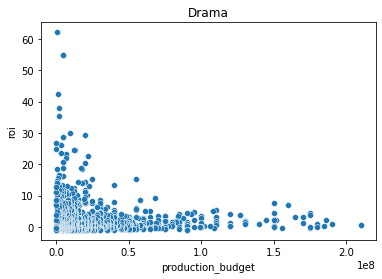

In [228]:
sns.scatterplot(data=drama, x="production_budget", y="roi", legend=False, sizes=(20, 2000))

plt.title('Drama')

plt.show()

In [229]:
horror = movies[movies['genres'].str.contains('Horror')]

horror

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,profit,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279,2011.0,93.0,Horror,2351345279,5.532577
75,69,"Jun 21, 2013",World War Z,190000000.0,202359711.0,531514650,2013.0,116.0,Horror,341514650,1.797446
103,94,"Aug 10, 2018",The Meg,178000000.0,145443742.0,529530715,2018.0,113.0,Horror,351530715,1.974892
121,2,"Nov 22, 2017",Coco,175000000.0,209726015.0,798008101,2017.0,98.0,Horror,623008101,3.560046
215,89,"May 11, 2012",Dark Shadows,150000000.0,79727149.0,238202668,2012.0,113.0,Horror,88202668,0.588018
...,...,...,...,...,...,...,...,...,...,...,...
6982,82,"Sep 17, 1999",Sugar Town,250000.0,178095.0,178095,2018.0,75.0,Horror,-71905,-0.287620
7039,26,"May 10, 2002",Hybrid,200000.0,162605.0,162605,2018.0,64.0,Horror,-37395,-0.186975
7061,43,"Sep 23, 2011",Weekend,190000.0,484592.0,1577585,2012.0,71.0,Horror,1387585,7.303079
7163,32,"Feb 11, 2011",Raymond Did It,40000.0,3632.0,3632,2011.0,83.0,Horror,-36368,-0.909200


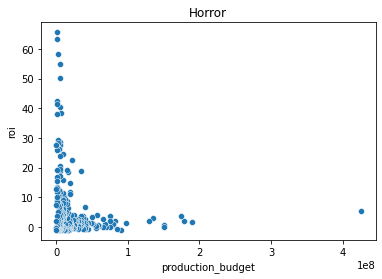

In [230]:
sns.scatterplot(data=horror, x="production_budget", y="roi", legend=False, sizes=(20, 2000))

plt.title('Horror')

plt.show()

In [231]:
sci_fi = movies[movies['genres'].str.contains('Sci-Fi')]

sci_fi

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,genres,profit,roi
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350,2019.0,113.0,Sci-Fi,-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963,2015.0,141.0,Sci-Fi,1072413963,3.243841
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2048134200,2018.0,149.0,Sci-Fi,1748134200,5.827114
13,14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,282778100,2012.0,132.0,Sci-Fi,7778100,0.028284
16,17,"May 6, 2016",Captain America: Civil War,250000000.0,408084349.0,1140069413,2016.0,147.0,Sci-Fi,890069413,3.560278
...,...,...,...,...,...,...,...,...,...,...,...
6982,82,"Sep 17, 1999",Sugar Town,250000.0,178095.0,178095,2018.0,75.0,Sci-Fi,-71905,-0.287620
7066,48,"Jul 22, 2011",Another Earth,175000.0,1321194.0,2102779,2011.0,92.0,Sci-Fi,1927779,11.015880
7090,68,"Apr 27, 2012",Sound of My Voice,135000.0,408015.0,429448,2011.0,85.0,Sci-Fi,294448,2.181096
7131,2,"Jul 17, 2015",Dawn of the Crescent Moon,75000.0,8799.0,8799,2014.0,95.0,Sci-Fi,-66201,-0.882680


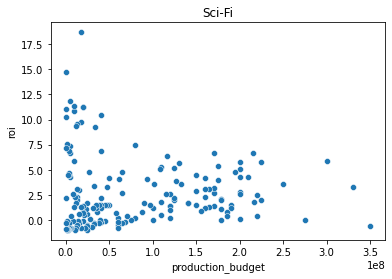

In [232]:
sns.scatterplot(data=sci_fi, x="production_budget", y="roi", legend=False, sizes=(20, 2000))

plt.title('Sci-Fi')

plt.show()

## Conclusion

After viewing the counts for each genre, I found Drama to have more than double the next highest genre, Comedy, with Action, Thriller, and Adventure just behind to complete the top five.


-These genres average ROI were all between 200% and 300%.

When comparing the average ROI for each genre, Horror, Musical, and Mystal all outpaced the top genres by count in having an
ROI in the range of 450% and 580%.

When comparing the production budgets to the ROI for each genre, I noticed movies with a low production cost were more likely to achieve higher ROIs.

-Horror is a good choice for a genre that had an overall lower cost in production, mostly under $100,000,000, with a higher chance for a large ROI.

-Drama, Action, and Comedy had generally higher budgets, up to 400,000,000 dollars, with some good opportunities for a high ROI if made on a budget below $200,000,000.

-Sci-Fi seems to be a great genre in that it has a good spread of high ROIs between lower and higher production cost.